In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from pathlib import Path
import os

In [13]:
path = Path('K:/Materials/Statistical Natural Language Processing/Project')
data_path = path/'data'
os.listdir(data_path)

['Home_and_Kitchen.json',
 'spam_sport.csv',
 'spam_sports.csv',
 'Sports_and_Outdoors.csv',
 'Sports_and_Outdoors.json',
 'text_sports.csv']

In [3]:
data = pd.read_csv(data_path/'spam_sports.csv', index_col = 'Unnamed: 0')
data

,Processed Text,class
0,classy sun shirt bought shirt husband upf love...,1.0
1,regret live caribbean buying product comparati...,0.0
2,worth may light racket spin speed control woul...,1.0
3,clean refresh fast many us amaze soap best cle...,1.0
4,triathlete neb purchase pearl izumi grip-lite ...,1.0
...,...,...
10541,good wear inch levi jean arge size snug fit wa...,1.0
10542,good price descent knife price son like play w...,1.0
10543,feel great stretch back hip perfectly high qua...,1.0
10544,daily carry flawless construction fit finish b...,1.0


# EDA

<AxesSubplot:>

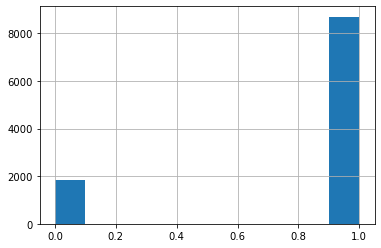

In [4]:
data['class'].hist()

In [17]:
vectorizer = TfidfVectorizer(lowercase = True, ngram_range = (1, 2), min_df = 0.01, max_df = 0.95, norm = 'l2')
tf_idf_matrix = vectorizer.fit_transform(data["Processed Text"])
tf_idf_table = pd.DataFrame(tf_idf_matrix.toarray(), columns = vectorizer.get_feature_names())
tf_idf_table

,able,absolutely,accurate,actually,add,addition,adjust,adjustable,adjustment,advertised,...,would buy,would recommend,wrist,wrong,yard,year,year old,yes,yet,zipper
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.064122,0.086317,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.183618,0.0,0.203713,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
10542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
10543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
10544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0


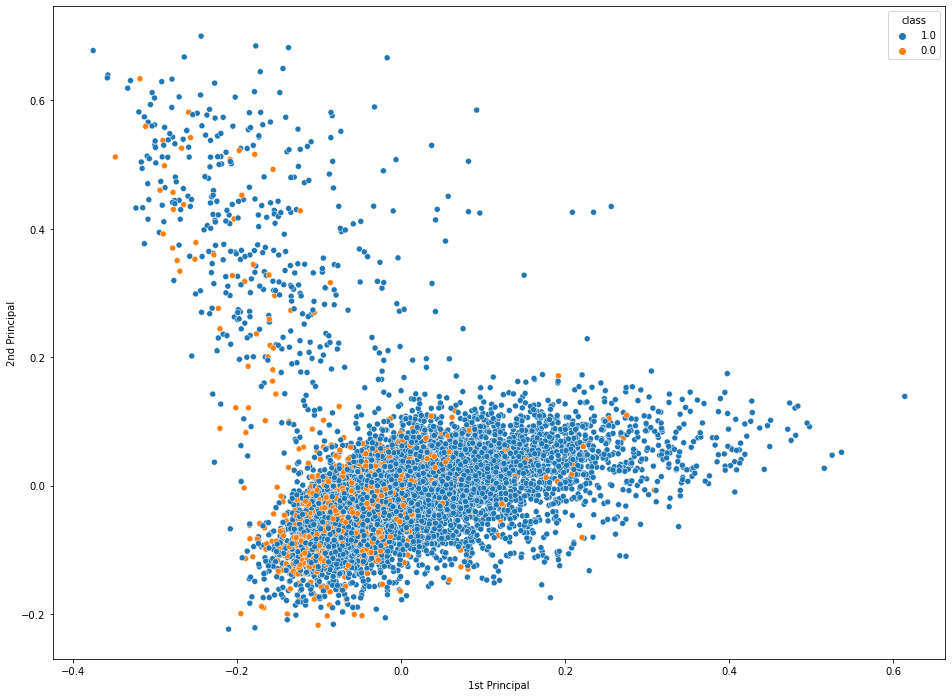

In [21]:
pca = PCA(n_components=2)
pca_tf_idf = pca.fit_transform(tf_idf_matrix.toarray())
plt.figure(figsize=(16, 12))
sns.scatterplot(x=pca_tf_idf[:,0], 
                y=pca_tf_idf[:,1], 
                hue=data['class'].astype(str))
plt.xlabel("1st Principal")
plt.ylabel("2nd Principal")
plt.show()